Optimal Planning with Dynamic Motion Primitives in Obstacle Scenarios
====

Generating some basic paths
----

In [1]:
import scipy.interpolate
import matplotlib.pyplot as plt
x = [0.0, 100.0]
y = [0.0, 100.0]

plt.scatter(x, y)
plt.plot(x, y, label="original curve")

# straight line DMP.
st_line = scipy.interpolate.interp1d(x, y)

test_x = []
test_y = []

for i in range(0, 101):
    test_x.append(i)
    test_y.append(st_line(i))

plt.plot(test_x, test_y, color='r', label='generated_path')
plt.scatter(test_x, test_y, color='b', s=0.5)
plt.legend()

print("value of y is: ", y)
print("length of test_x is: ", len(test_x))

straight_line_x, straight_line_y = test_x, test_y

value of y is:  [0.0, 100.0]
length of test_x is:  101


value of y is:  [0.0, 7.0, 10.0]
length of poly_x is:  101


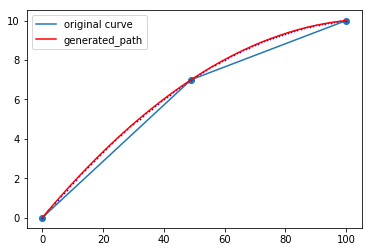

In [2]:
# generate polynomial curves
x = [0.0, 49.0, 100.0]
y = [0.0, 7.0, 10.0]

plt.scatter(x, y)
plt.plot(x, y, label="original curve")

poly_curve = scipy.interpolate.BarycentricInterpolator(x, y)
poly_x, poly_y = [], []

for i in range(0, 101):
    poly_x.append(i)
    poly_y.append(poly_curve(i))

plt.plot(poly_x, poly_y, color='r', label='generated_path')
plt.scatter(poly_x, poly_y, color='b', s=0.5)
plt.legend()

print("value of y is: ", y)
print("length of poly_x is: ", len(poly_x))

Turtlesim Path
----

This path has been recorded using a turtlesim simulator with a keyboard joystick interface

read successfully..
5.544444561000001
length of x is:  332


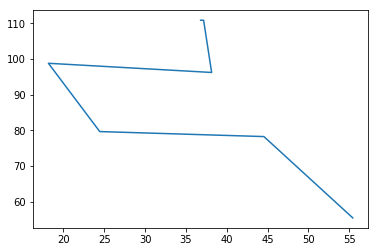

In [3]:
# libraries for loading the recorded trajectory and plotting

import matplotlib.pyplot as plt
from utils import get_trajectory

# the trajectory has been recorded in the ROS turtlesim by using the keyboard teleop interface and converted to a csv
# file from a rosbag file.

x, y = get_trajectory("../csv/data.csv")

# Scaling is done so that the node indices in grid search remain integeral for reso=1.0
x = [10 * i for i in x]
y = [10 * j for j in y]

print("length of x is: ", len(x))

plt.plot(x, y)
plt.show()

In [4]:
from dmp_discrete import DMPs_discrete
import numpy as np

# specify the number of basis functions in n_bfs, time resolution as dt and total run time.
dmp = DMPs_discrete(n_dmps=2, n_bfs=100, dt=0.01, run_time=1.0)
dmp_st_line = DMPs_discrete(n_dmps=2, n_bfs=100, dt=0.01, run_time=1.0)
dmp_poly = DMPs_discrete(n_dmps=2, n_bfs=100, dt=0.01, run_time=1.0)

# The input trajectory is also assumed to be having been executed in the time = run_time 
# learn the weights for the basis functions
dmp.imitate_path(y_des=np.array([x, y]))
dmp_st_line.imitate_path(y_des=np.array([straight_line_x, straight_line_y]))
dmp_poly.imitate_path(y_des=np.array([poly_x, poly_y]))
print("weights generated for the DMP")

weights generated for the DMP


Specify the start and goal positions for the rollout. In this example, we try to just use the same start and goal positions as in the demonstration.

In [5]:
dmp.y0[0] = x[0]
dmp.y0[1] = y[0]

dmp.goal[0] = x[-1]
dmp.goal[1] = y[-1]

dmp_st_line.y0[0] = straight_line_x[0]
dmp_st_line.y0[1] = straight_line_y[0]

dmp_poly.goal[0] = poly_x[-1]
dmp_poly.goal[1] = poly_y[-1]

y_track_nc, dy_track_nc, ddy_track_nc, s = dmp.rollout()
y_st_line, dy_st_line, ddy_st_line, s_st_line = dmp_st_line.rollout()
y_poly, dy_poly, ddy_poly, s_poly = dmp_poly.rollout()


For plotting the rolled out trajectory, execute the cell below.

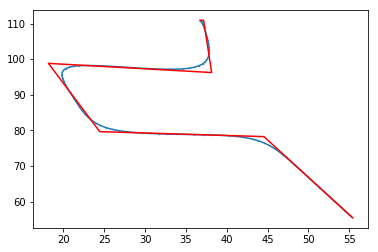

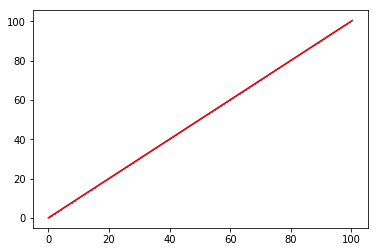

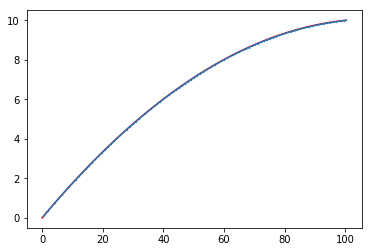

In [6]:
# print("length of y_track is: ", len(y_track_nc))
# print("dmp timestep is: ", dmp.dt)
# print("dmp total timesteps are: ", dmp.timesteps)
plt.plot(y_track_nc[:, 0], y_track_nc[:, 1])
plt.scatter(y_track_nc[:, 0], y_track_nc[:, 1], s=0.2)
plt.plot(x, y, color='r')
plt.show()

plt.plot(y_st_line[:, 0], y_st_line[:, 1])
plt.scatter(y_st_line[:, 0], y_st_line[:, 1], s=0.2)
plt.plot(straight_line_x, straight_line_y, color='r')
plt.show()


plt.scatter(y_poly[:, 0], y_poly[:, 1], s=0.2)
plt.plot(poly_x, poly_y, color='r')
plt.plot(y_poly[:, 0], y_poly[:, 1])
plt.show()

DMPs with Variable Start and Goal
---

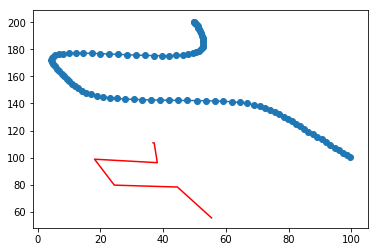

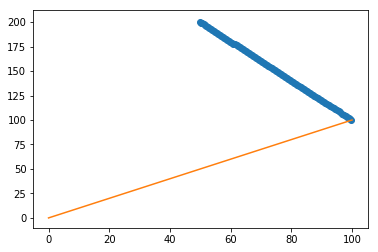

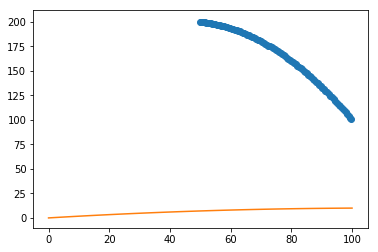

length of y_poly2 is:  100
length of y_track2 is:  100


In [7]:
dmp.y0[0] = 100.0
dmp.y0[1] = 100.0

dmp.goal[0] = 50.0
dmp.goal[1] = 200.0

dmp_st_line.y0[0] = 100.0
dmp_st_line.y0[1] = 100.0

dmp_st_line.goal[0] = 50.0
dmp_st_line.goal[1] = 200.0

dmp_poly.y0[0] = 100.0
dmp_poly.y0[1] = 100.0

dmp_poly.goal[0] = 50.0
dmp_poly.goal[1] = 200.0

y_track2, dy_track2, ddy_track2, s2 = dmp.rollout()
y_st_line2, dy_st_line2, ddy_st_line2, s_st_line2 = dmp_st_line.rollout()
y_poly2, dy_poly2, ddy_poly2, s_poly2 = dmp_poly.rollout()

plt.plot(y_track2[:, 0], y_track2[:, 1])
plt.scatter(y_track2[:, 0], y_track2[:, 1])
plt.plot(x, y, color='r')
plt.show()

plt.plot(y_st_line2[:, 0], y_st_line2[:, 1])
plt.scatter(y_st_line2[:, 0], y_st_line2[:, 1])
plt.plot(straight_line_x, straight_line_y)
plt.show()

plt.plot(y_poly2[:, 0], y_poly2[:, 1])
plt.scatter(y_poly2[:, 0], y_poly2[:, 1])
plt.plot(poly_x, poly_y)
plt.show()

print("length of y_poly2 is: ", len(y_poly2))
print("length of y_track2 is: ", len(y_track2))

Obstacle Worlds
---

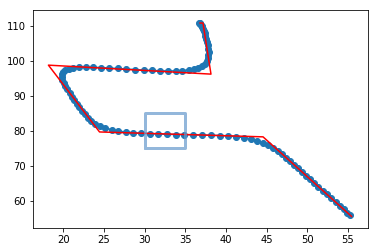

In [8]:
import math
from shapely.geometry.polygon import LinearRing, Polygon
from shapely.geometry import Point, mapping
from math import sqrt, ceil, floor

# specify the end points of the polygon.
coords = [(30.0, 75), (30, 85), (35, 85), (35, 75)]

obstacle = Polygon(coords)
ob_x, ob_y = obstacle.exterior.xy
plt.plot(y_track_nc[:, 0], y_track_nc[:, 1])
plt.scatter(y_track_nc[:, 0], y_track_nc[:, 1])
plt.plot(x, y, color='r')
plt.plot(ob_x, ob_y, color='#6699cc', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)


As you can see, since the demonstration was for an obstacle free scenario, the path rolled out by the DMP is not able to adapt to the obstacle that is present in the environment. Therefore, for making this adapt to the obstacle scenario, we try out various approaches: (1). Potential fields (2). Grid Search (3). Probabilistic Roadmaps (4). Time-Space Probabilistic Roadmap

Potential Field Methods
---

We first try out a potential field method. A point repulsive field is applied throughout the rolled out trajectory. The point repulsive field for a given point on the DMP, is the closest point on the obstacle to the DMP.

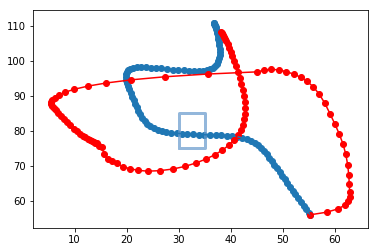

In [9]:
from utils import avoid_obstacles

# TODO: Alternative potential field expressions

dmp.y0[0] = x[0]
dmp.y0[1] = y[0]

dmp.goal[0] = x[-1]
dmp.goal[1] = y[-1]


y_track_pot, dy_track_pot, ddy_track_pot, s = dmp.rollout(obstacles=[obstacle], external_force=avoid_obstacles)


plt.plot(ob_x, ob_y, color='#6699cc', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)

plt.plot(y_track_nc[:, 0], y_track_nc[:, 1])
plt.scatter(y_track_nc[:, 0], y_track_nc[:, 1])

plt.plot(y_track_pot[:, 0], y_track_pot[:, 1], color='r')
plt.scatter(y_track_pot[:, 0], y_track_pot[:, 1], color='r')

Grid Search Based Methods
---

Above we can see that the obstacle field is not able to make the path feasible. The approach requires tuning hyperparamters such as the strength of the field. For many scenarios the approach might work but it provides no gurantee of feasibility and optimality. However, it is computationally cheaper than some of the other approaches that would be discussed later.

Now, we try out a Grid based Method, which gives a gurantee of finding a feasible solution if one exists given a small enough grid resolution. The edge weight is defined as the 2D euclidean distance of the grid point from the nearest point on the DMP, which serves as a guiding path. 

Once a graph is constructed from the grid points, a graph search algorithm is used to return the lowest cost path.

Note: Following parameters need tuning and experimentation:
1.Grid Resolution
2. Strength of potential field
3. Number of basis functions

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

from grid_search import Node, calc_final_path, verify_node, calc_index
from math import modf, sqrt, ceil, floor

# TODO: Animation plot in the single graph

show_animation = False

def calc_obstacle_map(obstacles, reso):

    minx = 0
    miny = 0
    maxx = 1000
    maxy = 1000

    xwidth = round(maxx - minx)
    ywidth = round(maxy - miny)

    # obstacle map generation
    obmap = [[False for i in range(xwidth)] for i in range(ywidth)]
    for ix in range(xwidth):
        x = ix + minx
        for iy in range(ywidth):
            y = iy + miny
            point = Point((reso * x, reso * y))
            for obstacle in obstacles:
                if obstacle.contains(point):
                    obmap[ix][iy] = True
                    break

    return obmap, minx, miny, maxx, maxy, xwidth, ywidth

                    
def dijkstra_planning(sx, sy, gx, gy, obstacles, reso, dmp=None,
                      dmp_vel=None, dt=0.01, deviation_penalty=True):
   
    print("start is: ", (sx, sy))
    print("goal is: ", (gx, gy))
    # scale the dmp and its velocities according to the resolution of the grid.
    print("shape of dmp is: ", dmp.shape)
    print("shape of dmp velocity is: ", dmp_vel.shape)
    for i in range(0, len(dmp)):
        for j in range(0, len(dmp[i])):
            dmp[i][j] = dmp[i][j] / reso
            dmp_vel[i][j] = dmp[i][j] / reso

    nstart = Node(round(sx / reso), round(sy / reso), 0.0, -1)

    ngoal = Node(round(gx / reso), round(gy / reso), 0.0, -1, len(dmp))

    ngoal = Node(round(gx / reso), round(gy / reso), 0.0, -1)

    obmap, minx, miny, maxx, maxy, xw, yw = calc_obstacle_map(obstacles, reso)

    motion = [[1, 0, 1],
              [0, 1, 1],
              [-1, 0, 1],
              [0, -1, 1],
              [-1, -1, math.sqrt(2)],
              [-1, 1, math.sqrt(2)],
              [1, -1, math.sqrt(2)],
              [1, 1, math.sqrt(2)]]

    openset, closedset = dict(), dict()
    openset[calc_index(nstart, xw, minx, miny)] = nstart

    while 1:
        c_id = min(openset, key=lambda o: openset[o].cost)
        current = openset[c_id]
        # show graph
        plt.plot(current.x * reso, current.y * reso, "xc")
        if show_animation:            
            if len(closedset.keys()) % 10 == 0:
                plt.pause(0.1)

        if current.x == ngoal.x and current.y == ngoal.y:
            print("[INFO]: searched reached the goal")
            ngoal.pind = current.pind
            ngoal.cost = current.cost
            break

        # Remove the item from the open set
        del openset[c_id]
        # Add it to the closed set
        closedset[c_id] = current

        # expand search grid based on motion model
        for i, _ in enumerate(motion):
            dmp_cost = calculate_dmp_cost(current.x, current.y,
                                          motion[i][0], motion[i][1],
                                          dmp, dmp_vel, obstacles, reso, dt,
                                          dev_penalty=deviation_penalty)
            node = Node(current.x + motion[i][0], current.y + motion[i][1],
                        current.cost + dmp_cost,
                        c_id)

            n_id = calc_index(node, xw, minx, miny)

            if not verify_node(node, obmap, minx, miny, maxx, maxy):
                continue

            if n_id in closedset:
                continue
                
            # Otherwise if it is already in the open set
            if n_id in openset:
                # print("nid exists in openset")
                if openset[n_id].cost > node.cost:
                    openset[n_id].cost = node.cost
                    openset[n_id].pind = c_id

            else:
                openset[n_id] = node
    
    # call to final_path to give out the trail for the lowest cost path.
    rx, ry, cost = calc_final_path(ngoal, closedset, reso)

    return rx, ry, cost


def calculate_dmp_cost(x, y, motion_x, motion_y, dmp, dmp_vel, obstacles=None, reso=1.0, dt=0.01,
                      dev_penalty=True):

    d = []

    for pt in dmp:
        distance = sqrt((x - pt[0]) ** 2 + (y - pt[1]) ** 2)
        d.append(distance)

    d = np.array(d)

    # closest point on the motion primitive.
    time_index = np.argmin(d)

    # time taken to traverse the required distance, if we were to travel at the velocity at the nearest DMP point.
    delta_t_index = (sqrt(motion_x ** 2 + motion_y ** 2)/sqrt(dmp_vel[time_index][0] ** 2 +
                                                              dmp_vel[time_index][1] ** 2))/dt
#     print("delta_t index is: ", delta_t_index)
#     print("t index is: ", (time_index + delta_t_index))
    if floor(time_index + delta_t_index) < len(dmp):
        
        # get the coordinates on the DMP for t + delta_t 
        dmp_0 = dmp[floor(time_index + delta_t_index)]

        if ceil(time_index + delta_t_index) < len(dmp):
            dmp_1 = dmp[ceil(time_index + delta_t_index)]
            dmp_next = dmp_0 + (dmp_1 - dmp_0) * modf(delta_t_index)[0]

        else:
            dmp_next = dmp_0
    else:
        dmp_next = dmp[-1]
    
    dmp_x = dmp_next[0]
    dmp_y = dmp_next[1]

    obstacle_cost = 0
    if obstacles is not None:
        for obstacle in obstacles:
            pol_ext = LinearRing(obstacle.exterior.coords)
            d = pol_ext.project(Point(reso * (x + motion_x), reso * (y + motion_y)))
            p = pol_ext.interpolate(d)
            obst_potential_pt = list(p.coords)[0]
            dist = sqrt((y + motion_y - round(obst_potential_pt[1]/reso)) ** 2 +
                        (x + motion_x - round(obst_potential_pt[0]/reso)) ** 2)
            obstacle_cost += 2/(dist + 0.0000001 ** 2)

    # print("obstacle cost is: ", obstacle_cost)
    
    cost = sqrt((y + motion_y - dmp_y) ** 2 + (x + motion_x - dmp_x) ** 2) + obstacle_cost
    
    if dev_penalty:
        cost -= sqrt((y - dmp[time_index][1]) ** 2 + (x - dmp[time_index][0]) ** 2)

    return cost

start is:  (55, 55)
goal is:  (36, 110)
shape of dmp is:  (100, 2)
shape of dmp velocity is:  (100, 2)
[INFO]: searched reached the goal
calculate final path called
final path calculated..
total path cost with turtlesim path is:  489.2124708820672


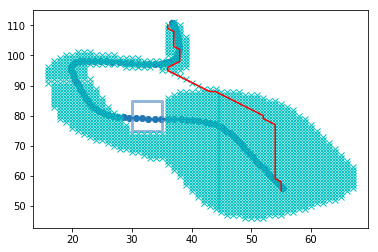

start is:  (0, 48)
goal is:  (52, 100)
shape of dmp is:  (100, 2)
shape of dmp velocity is:  (100, 2)
[INFO]: searched reached the goal
calculate final path called
final path calculated..
total path cost with st line path is:  831.7275975919086


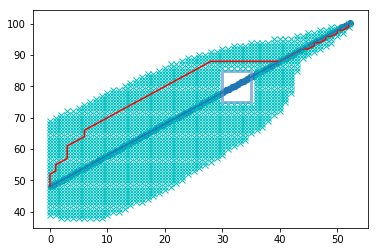

In [22]:
grid_size = 1.0

plt.plot(ob_x, ob_y, color='#6699cc', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)

plt.plot(y_track_nc[:, 0], y_track_nc[:, 1])
plt.scatter(y_track_nc[:, 0], y_track_nc[:, 1])

rx, ry, cost = dijkstra_planning(floor(x[0]), floor(y[0]), floor(x[-1]), floor(y[-1]), [obstacle], grid_size,
                          dmp=y_track_nc, dmp_vel=dy_track_nc, dt=dmp.dt)

print("total path cost with turtlesim path is: ", cost)

plt.plot(rx, ry, "-r")
plt.show()

plt.plot(ob_x, ob_y, color='#6699cc', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
dmp_st_line.y0[0] = 0.0
dmp_st_line.y0[1] = 48.0

dmp_st_line.goal[0] = 52.0
dmp_st_line.goal[1] = 100.0

y_st_line3, dy_st_line3, ddy_st_line3, s_st_line3 = dmp_st_line.rollout()



rx, ry, cost = dijkstra_planning(0, 48, 52, 100, [obstacle], grid_size,
                           dmp=y_st_line3, dmp_vel=dy_st_line3, dt=dmp.dt)

print("total path cost with st line path is: ", cost)
plt.plot(rx, ry, "-r")
plt.plot(y_st_line3[:, 0], y_st_line3[:, 1])
plt.scatter(y_st_line3[:, 0], y_st_line3[:, 1])

plt.show()

Without deviation penalty for the same goal and environment

In [ ]:
plt.plot(ob_x, ob_y, color='#6699cc', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)

plt.plot(y_track_nc[:, 0], y_track_nc[:, 1])
plt.scatter(y_track_nc[:, 0], y_track_nc[:, 1])

rx, ry = dijkstra_planning(floor(x[0]), floor(y[0]), floor(x[-1]), floor(y[-1]), [obstacle], grid_size,
                          dmp=y_track_nc, dmp_vel=dy_track_nc, dt=dmp.dt, deviation_penalty=False)

plt.plot(rx, ry, "-r")

From the above two plots, we observe that subtracting the previous deviation is not helpful as it encourages deviation from the guiding path. However, this might help to search for alternate paths when the obstacle density is higher.

In [ ]:
grid_size = 1.0

coords2 = [(20.0, 85), (20.0, 95), (25.0, 95), (25, 85)]

obstacle2 = Polygon(coords2)
ob_x2, ob_y2 = obstacle2.exterior.xy

plt.plot(ob_x, ob_y, color='#6699cc', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
plt.plot(ob_x2, ob_y2, color='#6699cc', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)

plt.plot(y_track_nc[:, 0], y_track_nc[:, 1])
plt.scatter(y_track_nc[:, 0], y_track_nc[:, 1])

rx, ry, cost = dijkstra_planning(floor(straight_linex[0]), floor(y[0]), floor(x[-1]), floor(y[-1]), [obstacle, obstacle2], grid_size,
                          dmp=y_track_nc, dmp_vel=dy_track_nc, dt=dmp.dt)

plt.plot(rx, ry, "-r")

In [ ]:
plt.plot(ob_x, ob_y, color='#6699cc', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
plt.plot(ob_x2, ob_y2, color='#6699cc', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)

plt.plot(y_track_nc[:, 0], y_track_nc[:, 1])
plt.scatter(y_track_nc[:, 0], y_track_nc[:, 1])

rx, ry, cost = dijkstra_planning(floor(x[0]), floor(y[0]), floor(x[-1]), floor(y[-1]), [obstacle, obstacle2], grid_size,
                          dmp=y_track_nc, dmp_vel=dy_track_nc, dt=dmp.dt, deviation_penalty=False)

plt.plot(rx, ry, "-r")

In this case, we can observe how the penalty terms plays it part as we get a more realistic curve with first plot. The above methods can be further speeded up by doing a forward-reverse search. 

Time-Space Grid Search 
---

Since, the cost is only dependent on the spatial distance from the guiding path, the search tends to jump forward in time to catch the future DMP points without consideration to time as seen in Fig 2.

To solve this we first align the 3D grid point(space-time) to the nearest space-time version of the DMP, and introduce the cost which is the spatial distance between the points.


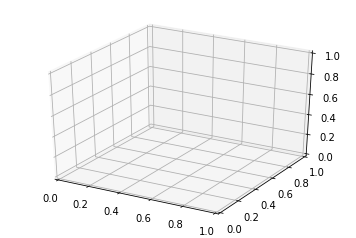

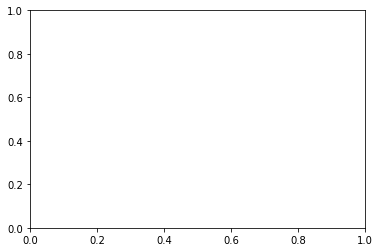

In [23]:
from grid_search_time import calc_final_path, verify_node, calc_obstacle_map

# TODO: Variants of the DMP cost.

# show_animation = False
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# fig2 = plt.figure()
# plt2d = fig2.add_subplot(111)

# changing the node definition to accomdate time coordinate
class Node(object):

    def __init__(self, x, y, t, cost, pind, dmp_closest_pt_index=None):
        self.x = x
        self.y = y
        self.t = t
        self.cost = cost
        self.pind = pind
        self.dmp_closest_pt_index = dmp_closest_pt_index

    def __str__(self):
        return str(self.x) + "," + str(self.y) + "," + str(self.t) + "," + str(self.cost) + "," + str(self.pind)


def dijkstra_planning(sx, sy, gx, gy, obstacles, reso, reso_time=0.1, dmp=None,
                      dmp_vel=None):
    """
    :param sx: start x coordinate
    :param sy: start y coordinate
    :param gx: goal x coordinate
    :param gy: goal y coordinate
    :param obstacles: list of shapely polygons
    :param reso: resolution for space
    :param reso_time: resolution for time
    :param cost_type: type of cost defining edge weights
    :param dmp: path given by a dmp
    :param dmp_vel: dmp_velocities
    :param dt: time resolution of the DMP
    :return: time parameterised path

    """
    
    # scale the dmp and its velocities according to the resolution of the grid.

    print("shape of dmp is: ", dmp.shape)
    print("shape of dmp velocity is: ", dmp_vel.shape)
    for i in range(0, len(dmp)):
        for j in range(0, len(dmp[i])):
            if j == 0 or j == 1:
                dmp[i][j] = dmp[i][j] / reso
                dmp_vel[i][j] = reso_time * dmp[i][j] / reso
            elif j == 2:
                dmp[i][j] = dmp[i][j] / reso_time
                dmp_vel[i][j] = dmp[i][j] / reso_time

    # print("dmp after scaling is: ", dmp)
    nstart = Node(round(sx / reso), round(sy / reso), 0.0, 0.0, -1)

    ngoal = Node(round(gx / reso), round(gy / reso), 0.0, 0.0, -1)

    obmap, minx, miny, maxx, maxy, xw, yw = calc_obstacle_map(obstacles, reso)

    # not all neighbors used, to keep the complexity of the problem under control
    motion = motion = [[1, 0, 1, math.sqrt(2)],
              [-1, 0, 1, math.sqrt(2)],
              [0, 1, 1, math.sqrt(2)],
              [0, -1, 1, math.sqrt(2)],
              [0, 0, 1, 1]]
    
    print("motion is: ", motion)
    openset, closedset = dict(), dict()
    openset[calc_index(nstart, xw, minx, miny)] = nstart

    while 1:

        c_id = min(openset, key=lambda o: openset[o].cost)
        current = openset[c_id]
        
        # show graph
        if show_animation:
            # print("doing search for a new point")
            ax.scatter(current.x * reso, current.y * reso, current.t * reso_time)
            plt2d.scatter(current.x * reso, current.y * reso)
            if len(closedset.keys()) % 10 == 0:
                plt.pause(0.0000000000001)

        if current.x == ngoal.x and current.y == ngoal.y:
            print("[INFO]: searched reached the goal")
            ngoal.pind = current.pind
            ngoal.cost = current.cost
            ngoal.t = current.t
            break

        # Remove the item from the open set
        del openset[c_id]
        # Add it to the closed set
        closedset[c_id] = current

        # expand search grid based on motion model
        for i, _ in enumerate(motion):
            dmp_cost, min_index = calculate_dmp_cost(current.x, current.y, current.t,
                                              motion[i][0], motion[i][1], motion[i][2],
                                              dmp, dmp_vel, obstacles, reso=reso)

            node = Node(current.x + motion[i][0], current.y + motion[i][1],
                            current.t + motion[i][2], current.cost + dmp_cost,
                            c_id, min_index)
                # print("node is: ", node.t)
            n_id = calc_index(node, xw, minx, miny)
            if not verify_node(node, obmap, minx, miny, maxx, maxy):
                continue

            if n_id in closedset:
                continue
            # Otherwise if it is already in the open set
            if n_id in openset:
                if openset[n_id].cost > node.cost:
                    openset[n_id].cost = node.cost
                    openset[n_id].pind = c_id
            else:
                openset[n_id] = node

    rx, ry, rz = calc_final_path(ngoal, closedset, reso, reso_time)

    return rx, ry, rz


def calc_index(node, xwidth, xmin, ymin):
    # return (node.y - ymin) * xwidth + (node.x - xmin) + node.t
    return node.x, node.y, node.t


def calculate_dmp_cost(x, y, t, motion_x, motion_y, delta_t, dmp, dmp_vel, obstacles=None, reso=1.0):
    """
    :param x: x coordinate of the point which we are moving to
    :param y: y coordinate of the point which we are moving to
    :param t: t coordinate of the point which we are moving to
    :param motion_x: distance to be moved along x
    :param motion_y: distance to be moved along y
    :param delta_t: movement along time axis
    :param dmp: reference dmp
    :param dmp_vel: reference dmp velocities
    :param obstacles: list of shapely polygons
    :param reso: grid resolution
    :return: cost of the given node

    """

    d = []

    for pt in dmp:
        
        distance = sqrt((x + motion_x - pt[0]) ** 2 + (y + motion_y - pt[1]) ** 2 + (t + delta_t - pt[2]) ** 2)
        d.append(distance)

    d = np.array(d)

    min_index = np.argmin(d)

    vx = motion_x/ delta_t
    vy = motion_y/ delta_t

    d_vel = []

    for pt in dmp:
        distance = sqrt((x - pt[0]) ** 2 + (y - pt[1]) ** 2 + (t - pt[2]) ** 2)
        d_vel.append(distance)

    d_vel = np.array(d_vel)

    min_index_vel = np.argmin(d_vel)

    cost = sqrt((x + motion_x - dmp[min_index][0]) ** 2 + (y + motion_y - dmp[min_index][1]) ** 2 +
                (vx - dmp_vel[min_index_vel][0]) ** 2 + (vy - dmp_vel[min_index_vel][1]) ** 2)

    obstacle_cost = 0
    if obstacles is not None:
        for obstacle in obstacles:
            pol_ext = LinearRing(obstacle.exterior.coords)
            d = pol_ext.project(Point(reso * (x + motion_x), reso * (y + motion_y)))
            p = pol_ext.interpolate(d)
            obst_potential_pt = list(p.coords)[0]
            dist = sqrt((y + motion_y - obst_potential_pt[1]/reso) ** 2 +
                        (x + motion_x - obst_potential_pt[0]/reso) ** 2)
            obstacle_cost += 100/((dist + 0.0000001) ** 2)

    # print("obstacle cost is: ", obstacle_cost)

    cost += obstacle_cost

    return cost, min_index

In [24]:
y_track_nc_time = []
print("total time is: ", len(y_track_nc) * dmp.dt)
for i in range(0, len(y_track_nc)):
    y_track_nc_time.append((i + 1) * dmp.dt)

print("end time in the time array is: ", y_track_nc_time[-1])
y_track_nc_time = np.array([y_track_nc_time])
y_track_nc_x = np.array(y_track_nc[:, 0])
y_track_nc_y = np.array(y_track_nc[:, 1])

# plot time-space DMP.
ax.scatter(y_track_nc_x, y_track_nc_y, y_track_nc_time)
ax.plot_wireframe(y_track_nc_x, y_track_nc_y, np.zeros((1, len(y_track_nc))))


# plot obstacles
plt2d.plot(ob_x, ob_y, color='#6699cc', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)

# plot spacial DMP
plt2d.plot(y_track_nc[:, 0], y_track_nc[:, 1])
plt2d.scatter(y_track_nc[:, 0], y_track_nc[:, 1])

# plot obstacle on the 3D plot
ax.plot_wireframe(np.array(ob_x), np.array(ob_y), np.zeros((1, len(ob_x))))

dmp_time_para = []
dmp_dy_time_para = []
for i in range(0, len(y_track_nc)):
    temp = list(y_track_nc[i])
    temp_vel = list(dy_track_nc[i])
    temp.append((i + 1) * dmp.dt)
    temp_vel.append((i + 1) * dmp.dt)
    dmp_dy_time_para.append(temp_vel)
    dmp_time_para.append(temp)

dmp_time_para = np.array(dmp_time_para)
dmp_dy_time_para = np.array(dmp_dy_time_para)

total time is:  1.0
end time in the time array is:  1.0


NameError: name 'ax' is not defined

Probabilistic Roadmap Methods
---

The grid search based methods provide promising results however, they are really expensive which makes them unfit for any practical application, where the DOFs are really high.

Therefore, sampling based methods have been used for planning.

In [45]:
from prm import Node, KDTree, sample_dmp_normal
from shapely.geometry.polygon import LinearRing, Polygon, LineString
from math import log, pow
# uniform sampler
from prm import sample_points
import scipy.interpolate
import time
from statistics import mean

 
N_SAMPLE = 50000  # number of sample_points

# some redundant variables, useful if we want to restrict number of neigbors of all edges and 
# use animation for plotting.

N_KNN = 100             # number of edge from one sampled point
MAX_EDGE_LEN = 10000.0  # [m] Maximum edge length
show_animation = False


show_animation = False

class Node:
    """
    Node class for dijkstra search
    """

    def __init__(self, x, y, cost, incremental_cost=0.0, 
                 obstacle_cost=0.0, pind=None):
        self.x = x
        self.y = y
        # self.t = t
        self.cost = cost
        self.pind = pind
        self.incremental_cost = incremental_cost
        self.obstacle_cost = obstacle_cost

    def __str__(self):
        return str(self.x) + "," + str(self.y) + "," + str(self.cost) + "," + str(self.pind)

    
def PRM_planning(sx, sy, gx, gy, obstacles, dmp=None, num_points=N_SAMPLE, dmp_vel=None,
                sampling_distribution="uniform", dynamic_radius=True, var=2.0, 
                 plot_sampled=False):

    dmp_x_min = np.min(dmp[:, 0])
    dmp_y_min = np.min(dmp[:, 1])

    dmp_x_max = np.max(dmp[:, 0])
    dmp_y_max = np.max(dmp[:, 1])

    if sampling_distribution == "uniform":
        sample_x, sample_y = sample_points(sx, sy, gx, gy, obstacles, minx=(dmp_x_min * 0.7), 
                                           maxx=(dmp_x_max * 1.5),miny=(dmp_y_min * 0.7), 
                                           maxy=(dmp_y_max * 1.5), num_points=1000, dmp=dmp)
        
    # some corrections in the implementation of the sample_normal are yet to be done.
    elif sampling_distribution == "dmp_normal":
        sample_x, sample_y = sample_dmp_normal(sx, sy, gx, gy, obstacles=obstacles, dmp=dmp, variance=var)
        
    if show_animation:
        plt.plot(sample_x, sample_y, ".b")
        plt.pause(0.01)

    if plot_sampled:
        plt.plot(sample_x, sample_y, ".b")
    
    st_time = time.time()
    road_map = generate_roadmap(sample_x, sample_y, obstacles, dynamic_radius=dynamic_radius)
    
    # plot_road_map(road_map, sample_x, sample_y)
    print("roadmap generated...")
    roadmap_time = time.time() - st_time
    print("time taken to construct roadmap is: ", roadmap_time)
    
    plt.plot(dmp[:, 0], dmp[:, 1], color='b')
    plt.scatter(dmp[:, 0], dmp[:, 1], color='r')

    st_time = time.time()
    rx, ry, cost, inc_cost, obst_cost = dijkstra_planning(sx, sy, gx, gy, road_map, 
                                                          sample_x, sample_y, obstacles, dmp, dmp_vel)
    dij_finish_time = time.time()
    print("time taken by dijkstra's planning is: ", dij_finish_time)
    print("planning done")

    return rx, ry, cost, inc_cost, obst_cost


def generate_roadmap(sample_x, sample_y, obstacles, dynamic_radius=True):
    
    road_map = []
    nsample = len(sample_x)
  
    skdtree = KDTree(np.vstack((sample_x, sample_y)).T)
    neighbor_search_time = []
    collision_check_time_per_node = []

    for (i, ix, iy) in zip(range(nsample), sample_x, sample_y):
        
        gamma = 40.0
        if dynamic_radius:
            if i == 0 or i == 1:
                search_radius = 40.0
            else:
                # since it is a 2D configuration space we will use power 0.5 for the asymptotically optimal case.
                search_radius = gamma * pow((log(i)/ i), 0.5)
                # print("optimal search radius is: ", search_radius)
        
        else:
            search_radius = 40.0
        
        st_time = time.time()
        index = skdtree.search_in_distance(np.array([ix, iy]), search_radius)
        neighbor_search_time.append(time.time() - st_time)
        
        inds = index
        edge_id = []
        
        collision_check_st_time = 0.0
        for ii in range(1, len(inds)):
            s_time = time.time()
            nx = sample_x[inds[ii]]
            ny = sample_y[inds[ii]]

            l = LineString([[ix, iy], [nx, ny]])
            for obstacle in obstacles:
                if not l.intersects(obstacle):
                    edge_id.append(inds[ii])
                    # plt.plot([ix, nx], [iy, ny], 'bo')
        
        collision_check_time = time.time() - collision_check_st_time
        # print("collision check time is: ", collision_check_time)
        collision_check_time_per_node.append(collision_check_time)

        road_map.append(edge_id)
    
    print("average time for neighbor search: ", mean(neighbor_search_time))
    print("average time for collision check is: ", mean(collision_check_time_per_node))
    return road_map


def dijkstra_planning(sx, sy, gx, gy, road_map, sample_x, sample_y, obstacles, dmp=None,
                      dmp_vel=None, deviation_penalty=True, edge_reso=10.0):
    
    # useful when using the space-time implementation. vmax and vmin decide what are the corresponding 
    # feasible edges in space-time for an edge in the 2D roadmap
    
    avg_distance = 0.0
    for i in range(0, len(dmp) - 1):
        avg_distance += math.sqrt((dmp[i][0] - dmp[i+1][0]) ** 2 + (dmp[i][1] - dmp[i+1][1]) ** 2)

    avg_distance /= len(dmp)
    edge_reso = 3 * avg_distance
    print("edge resolution is: ", edge_reso)

    nstart = Node(sx, sy, 0.0, pind=-1)
    ngoal = Node(gx, gy, 0.0, pind=-1)

    openset, closedset = dict(), dict()
    openset[len(road_map) - 2] = nstart

    while True:
        if not openset:
            print("Cannot find path")
            break

        c_id = min(openset, key=lambda o: openset[o].cost)
        current = openset[c_id]
        plt.plot(current.x, current.y, "xg")
        
        # show graph
        if show_animation and len(closedset.keys()) % 2 == 0:
            plt.plot(current.x, current.y, "xg")
            plt.pause(0.001)

        if c_id == (len(road_map) - 1):
            print("goal is found!")
            ngoal.pind = current.pind
            ngoal.cost = current.cost
            # ngoal.t = current.t
            break

        # Remove the item from the open set
        del openset[c_id]
        # Add it to the closed set
        closedset[c_id] = current

        # expand search grid based on motion model
        # cheaper methods need to be used to find out the closest points instead of iterating over each
        # outgoing edge from the node.
        
        for i in range(len(road_map[c_id])):
            # get the 2D coordinates of the edge end point 
            n_id = road_map[c_id][i]
            dx = sample_x[n_id] - current.x
            dy = sample_y[n_id] - current.y
            
            pts = [(current.x, current.y)]
            dist_move = math.sqrt(dx ** 2 + dy ** 2)
            if dist_move > edge_reso:
                k = int(dist_move / edge_reso)
                if k > 1:
                    dmp_cost = 0
                    incremental_cost = 0
                    obstacle_cost = 0
                    for i in range(1, k):
                        del_x = (i * current.x + (k - i) * sample_x[n_id])/k
                        del_y = (i * current.y + (k - i) * sample_x[n_id])/k
                        cost, inc_cost, obst_cost = calculate_dmp_cost(pts[-1][0], pts[-1][1],  
                                                                       del_x, del_y, dmp, dmp_vel, 
                                                                       obstacles, deviation_penalty)
                       
                        dmp_cost += cost
                        obstacle_cost += obst_cost
                        incremental_cost += inc_cost
                        
                        pts.append((current.x + del_x, current.y + del_y))
                    
                else:
                    dmp_cost, incremental_cost, obstacle_cost = calculate_dmp_cost(current.x, current.y,  
                                                                                   dx, dy, dmp, dmp_vel, 
                                                                                   obstacles, deviation_penalty)
            else:
                dmp_cost, incremental_cost, obstacle_cost = calculate_dmp_cost(current.x, current.y,  dx, dy,
                                                                               dmp, dmp_vel, obstacles, 
                                                                               deviation_penalty)
                
            # print("dmp cost during node instantiation is: ", dmp_cost)
            node = Node(sample_x[n_id], sample_y[n_id],
                        current.cost + dmp_cost, obstacle_cost=obstacle_cost,
                        incremental_cost=incremental_cost, pind=c_id)

            if n_id in closedset:
                continue
            # Otherwise if it is already in the open set
            if n_id in openset:
                if openset[n_id].cost > node.cost:
                    openset[n_id].cost = node.cost
                    openset[n_id].pind = c_id
            else:
                openset[n_id] = node

    # generate final course
    total_path_cost = 0.0
    total_incremental_cost = 0.0
    total_obstacle_cost = 0.0
    rx, ry = [ngoal.x], [ngoal.y]
    pind = ngoal.pind
    while pind != -1:
        n = closedset[pind]
        rx.append(n.x)
        ry.append(n.y)
        total_path_cost += n.cost
        total_incremental_cost += n.incremental_cost
        total_obstacle_cost += n.obstacle_cost
        pind = n.pind

    return rx, ry, total_path_cost, total_incremental_cost, total_obstacle_cost

def calculate_dmp_cost(x, y, motion_x, motion_y, dmp, dmp_vel, obstacles=None, dev_penalty=False, dt=0.01,
                      edge_reso=None, obst_cost=True):
            
    
    d = []

    for pt in dmp:        
        distance = sqrt((x - pt[0]) ** 2 + (y - pt[1]) ** 2)
        d.append(distance)

    d = np.array(d)

    # closest point on the motion primitive.
    time_index = np.argmin(d)

    # time taken to traverse the required distance, if we were to travel at the velocity at the nearest DMP point.
    delta_t_index = (sqrt(motion_x ** 2 + motion_y ** 2)/sqrt(dmp_vel[time_index][0] ** 2 +
                                                              dmp_vel[time_index][1] ** 2))/dt    
    
    if floor(time_index + delta_t_index) < len(dmp):
        
        # get the coordinates on the DMP for t + delta_t 
        dmp_0 = dmp[floor(time_index + delta_t_index)]

        if ceil(time_index + delta_t_index) < len(dmp):
            dmp_1 = dmp[ceil(time_index + delta_t_index)]
            dmp_next = dmp_0 + (dmp_1 - dmp_0) * modf(delta_t_index)[0]

        else:
            dmp_next = dmp_0
    else: 
        dmp_next = dmp[-1]

    dmp_x = dmp_next[0]
    dmp_y = dmp_next[1]

    obstacle_cost = 0
    if obst_cost:
        if obstacles is not None:
            for obstacle in obstacles:
                pol_ext = LinearRing(obstacle.exterior.coords)
                d = pol_ext.project(Point((x + motion_x), (y + motion_y)))
                p = pol_ext.interpolate(d)
                obst_potential_pt = list(p.coords)[0]
                dist = sqrt((y + motion_y - round(obst_potential_pt[1])) ** 2 +
                            (x + motion_x - round(obst_potential_pt[0])) ** 2)
                obstacle_cost += 1/((dist + 0.0000001) ** 2)

        # print("obstacle cost is: ", obstacle_cost)
    
    incremental_cost = sqrt((y + motion_y - dmp_y) ** 2 + (x + motion_x - dmp_x) ** 2) 
    
    if dev_penalty:
        incremental_cost -= sqrt((y - dmp[time_index][1]) ** 2 + (x - dmp[time_index][0]) ** 2)
    
    if obst_cost:
        cost = incremental_cost + obstacle_cost
    
    else:
        cost = incremental_cost
        

    return cost, incremental_cost, obstacle_cost


def plot_road_map(road_map, sample_x, sample_y):  # pragma: no cover
    
    st_time = time.time()
    for i, _ in enumerate(road_map):
        for ii in range(len(road_map[i])):
            ind = road_map[i][ii]

            plt.plot([sample_x[i], sample_x[ind]],
                     [sample_y[i], sample_y[ind]], "-k", linewidth=0.3)
    print("time taken to plot roadmaps is: ", time.time() - st_time)

start
calling PRM Planning
sample dmp normal called..
average time for neighbor search:  3.668100772027722e-05
average time for collision check is:  1559109581.7516544
roadmap generated...
time taken to construct roadmap is:  2.416372776031494
edge resolution is:  2.741561265879324
goal is found!
time taken by dijkstra's planning is:  1559109609.125432
planning done
planning done..
average cost for dynamic radius approach is:  2379.595737514585
average incremental cost is:  5560.30806645798
average obstacle cost is:  0.021072596882683484
number of nodes in the optimal path are:  332


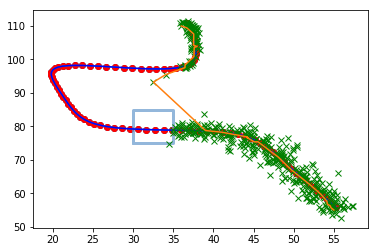

In [46]:

print("start")

plt.plot(ob_x, ob_y, color='#6699cc', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)

plt.plot(y_track_nc[:, 0], y_track_nc[:, 1])
plt.scatter(y_track_nc[:, 0], y_track_nc[:, 1])

dynamic_radius_path_cost = []
dynamic_radius_incremental_cost = []
dynamic_radius_obstacle_cost = []

for i in range(0, 1):
    print("calling PRM Planning")
    rx, ry, path_cost, inc_cost, obs_cost = PRM_planning(floor(x[0]), floor(y[0]), floor(x[-1]), floor(y[-1]), 
                                    [obstacle], dmp=y_track_nc, dmp_vel=dy_track_nc, dynamic_radius=True,
                                    sampling_distribution="dmp_normal")
    print("planning done..")
    dynamic_radius_path_cost.append(path_cost)
    dynamic_radius_incremental_cost.append(inc_cost)
    dynamic_radius_obstacle_cost.append(obs_cost)

mean_cost = mean(dynamic_radius_path_cost)
mean_inc_cost = mean(dynamic_radius_incremental_cost)
mean_obs_cost = mean(dynamic_radius_obstacle_cost)

print("average cost for dynamic radius approach is: ", mean_cost)
print("average incremental cost is: ", mean_inc_cost)
print("average obstacle cost is: ", mean_obs_cost)

rx = np.array(rx)
ry = np.array(ry)

print("number of nodes in the optimal path are: ", len(x))

# plt.legend(plot_paths, legend_key, loc='lower right')
plt.plot(rx, ry)
plt.show()

# static_radius_path_cost = []

# for i in range(0, 2):
#     print("calling PRM Planning")
#     rx, ry, path_cost, _, _  = PRM_planning(floor(x[0]), floor(y[0]), floor(x[-1]), floor(y[-1]), 
#                                     [obstacle], dmp=y_track_nc, dmp_vel=dy_track_nc, dynamic_radius=False,
#                                     sampling_distribution="dmp_normal", plot_sampled=False)
#     print("planning done..")
#     static_radius_path_cost.append(path_cost)
    

# mean_cost = mean(static_radius_path_cost)
# print("average cost for dynamic radius approach is: ", mean_cost)

# rx = np.array(rx)
# ry = np.array(ry)

# # plt.legend(plot_paths, legend_key, loc='lower right')
# plt.plot(rx, ry)
# plt.show()



Following experiments are required to be done:

1. Plot the obstacle and dmp cost for the optimal path given out by the dmp
2. Comparison plots for the path costs for using dynamic radius and static with different number of nodes
3. Just variation of optimal path cost with the number of nodes
4. Changing co-variances of the normal distribution
5. Comparison plots between uniform and normal distributions